<a href="https://colab.research.google.com/github/alonsosilvaallende/COVID-19/blob/master/COVID_Chile_Examenes_PCR_Realizados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

In [0]:
tests_raw = pd.read_csv(
    'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto7/PCR.csv',
    index_col='Region')
tests_raw = tests_raw.fillna(0)

In [0]:
casos_raw = pd.read_csv(
    "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto3/CasosTotalesCumulativo.csv", 
    index_col='Region')

In [0]:
tests_total = pd.Series(dtype='float64')
for date in tests_raw.columns:
  tests_raw[date] = tests_raw[date].apply(lambda x: 0 if x=='-' else x)
  tests_raw[date] = tests_raw[date].astype(int)
  tests_total[date] = np.sum(tests_raw[date])

In [0]:
tests_raw.loc['Total'] = tests_total

In [9]:
tests_raw

,Poblacion,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13
Region,,,,,,
Arica y Parinacota,252110,70,0,0,103,0
Tarapaca,382773,0,0,0,0,0
Antofagasta,691854,182,128,107,175,103
Atacama,314709,57,52,60,25,20
Coquimbo,836096,0,0,0,0,0
Valparaiso,1960170,301,249,248,273,223
Metropolitana,8125072,5383,3158,2105,3861,1850
Del Libertador General Bernardo O’Higgins,991063,68,0,74,0,74
Maule,1131939,397,219,0,341,113


In [11]:
casos_raw.head()

,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11
Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Arica y Parinacota,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,2,2,3,3,3,4,6,6,6,7,12,12,28,41,53,63,75,87,107
Tarapaca,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,5,5,5,6,8,10,10,12,13,17,20,21,23,26,29,35,38
Antofagasta,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,6,10,11,11,11,13,20,21,25,27,35,35,39,47,54,55,60,68,69,77,92,110,117
Atacama,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,3,3,5,5,5,5,6,8,10,13,13
Coquimbo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,3,5,5,6,11,13,14,15,18,27,28,30,34,35,44,50,51,52,56,61,61,64


In [0]:
tests_20200408 = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto4/2020-04-08-CasosConfirmados-totalRegional.csv', index_col='Region')

In [0]:
tests_20200413 = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto4/2020-04-13-CasosConfirmados-totalRegional.csv', index_col='Region')

In [28]:
len(tests_20200408), len(tests_20200413), len(tests_20200413['Casos  totales'] - tests_20200408['Casos  totales'])

(17, 17, 17)

In [0]:
positividad = 100*(tests_20200413['Casos  totales'] - tests_20200408['Casos  totales'])/tests_raw.drop(columns='Poblacion').sum(axis=1).values

In [0]:
positividad = positividad.drop(['Tarapaca', 'Coquimbo'])

In [48]:
positividad

Region
Arica  y  Parinacota    30.057803
Antofagasta             10.359712
Atacama                  2.336449
Valparaiso               3.709428
Metropolitana            7.672556
O'Higgins                2.314815
Maule                    2.056075
Nuble                    6.499430
Biobio                   4.896043
Araucania               15.479115
Los  Rios               26.373626
Los  Lagos               5.600815
Aysen                    0.000000
Magallanes              63.948498
Total                    8.069646
Name: Casos  totales, dtype: float64

In [0]:
positividad = positividad.sort_values(ascending=True)

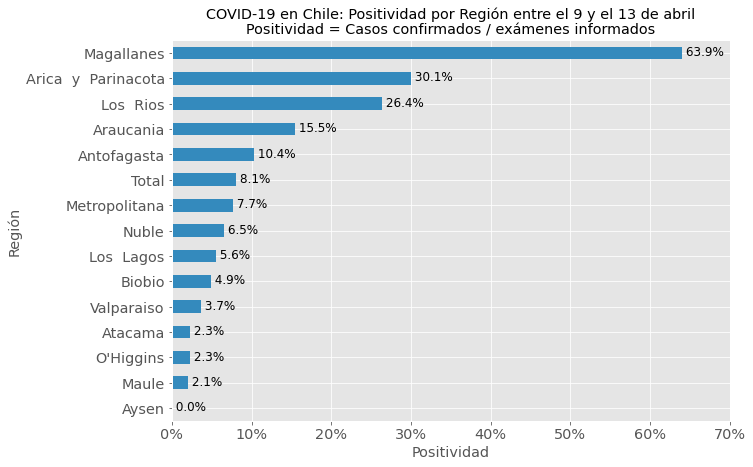

In [61]:
fig, ax = plt.subplots(figsize=(10,7))
positividad.plot(kind='barh', ax=ax, color='C1', fontsize='x-large')
for i, val in enumerate(positividad):
  ax.text(val, i-0.1, f" {val:.1f}%", fontsize='large')
ax.set_xticks([0,10,20,30,40,50,60,70])
ax.set_xticklabels(['0%', '10%', '20%', '30%', '40%', '50%' ,'60%' ,'70%' ])
ax.set_title(f'COVID-19 en Chile: Positividad por Región entre el 9 y el 13 de abril\nPositividad = Casos confirmados / exámenes informados', fontsize='x-large')
ax.set_xlabel(f'Positividad', fontsize='x-large')
ax.set_ylabel(f'Región', fontsize='x-large')
plt.xlim(0,70)
plt.savefig("2020-04-14-COVID-19-Chile-Positividad-por-Region.png", format='png', dvi=1200)

In [0]:
from google.colab import files
files.download("2020-04-14-COVID-19-Chile-Positividad-por-Region.png")

In [0]:
date = '2020-04-10'

In [0]:
data = pd.DataFrame()

In [0]:
data['Casos confirmados'] = casos_raw[date] - casos_raw[(pd.to_datetime(date)-pd.DateOffset(1)).strftime('%Y-%m-%d')]

In [0]:
data['Tests'] = tests_raw[date].values

In [0]:
positividad = pd.Series(dtype='float64')
for i in np.arange(len(data)):
  if data['Tests'].iloc[i] != 0:
    positividad[f'{i}'] = f"{data['Casos confirmados'].iloc[i]/data['Tests'].iloc[i]*100:.1f}"
  else:
    positividad[f'{i}'] = 0.0

In [0]:
data['Positividad (%)'] = positividad.values

In [0]:
data

,Casos confirmados,Tests,Positividad (%)
Region,,,
Arica y Parinacota,12,0,0
Tarapaca,6,0,0
Antofagasta,18,128,14.1
Atacama,3,52,5.8
Coquimbo,0,0,0
Valparaiso,11,249,4.4
Metropolitana,361,3158,11.4
O’Higgins,0,0,0
Maule,3,219,1.4


In [0]:
data['Positividad (%)'] = data['Positividad (%)'].astype(float)

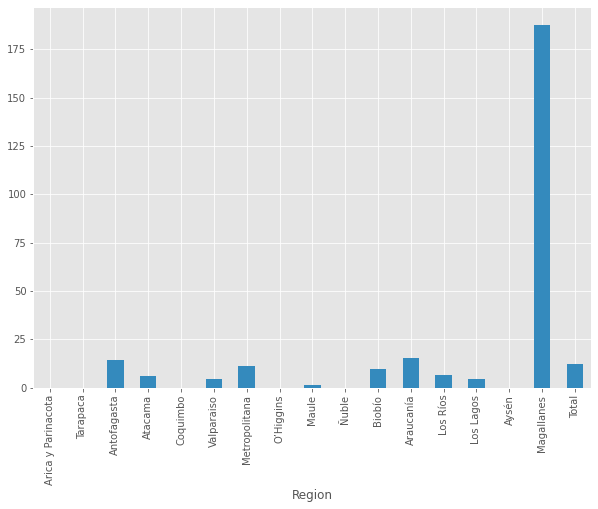

In [0]:
fig, ax = plt.subplots(figsize=(10,7))
data['Positividad (%)'].plot(kind='bar', ax=ax, color='C1')
plt.show()